In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

### chọn dataset 

In [2]:
df = pd.read_csv('imdb_data.csv')

In [3]:
#Kiểm tra và cho biết thông tin 
print("Thông tin về dataset:")
print(df.info())

Thông tin về dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3348 entries, 0 to 3347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3348 non-null   object 
 1   primaryTitle    3348 non-null   object 
 2   originalTitle   3348 non-null   object 
 3   isAdult         3348 non-null   int64  
 4   runtimeMinutes  3348 non-null   int64  
 5   genres          3348 non-null   object 
 6   averageRating   3348 non-null   float64
 7   numVotes        3348 non-null   int64  
 8   budget          3348 non-null   int64  
 9   gross           3297 non-null   float64
 10  release_date    3343 non-null   object 
 11  directors       3348 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 314.0+ KB
None


In [4]:
df.head()

id    primaryTitle   originalTitle  isAdult  runtimeMinutes  \
0  tt0035423  Kate & Leopold  Kate & Leopold        0             118   
1  tt0065421  The Aristocats  The AristoCats        0              78   
2  tt0065938  Kelly's Heroes  Kelly's Heroes        0             144   
3  tt0066026         M*A*S*H         M*A*S*H        0             116   
4  tt0066206          Patton          Patton        0             172   

                       genres  averageRating  numVotes    budget       gross  \
0      Comedy,Fantasy,Romance            6.4     87925  48000000  76019048.0   
1  Adventure,Animation,Comedy            7.1    111758   4000000  35459543.0   
2        Adventure,Comedy,War            7.6     52628   4000000   5200000.0   
3            Comedy,Drama,War            7.4     75784   3500000  81600000.0   
4         Biography,Drama,War            7.9    106476  12000000  61749765.0   

        release_date              directors  
0  December 11, 2001          James Mangold  
1  December 11, 1970    Wolfgang Reitherman  
2    January 1, 1970        Brian G. Hutton  
3   January 25, 1970          Robert Altman  
4   February 4, 1970  Franklin J. Schaffner

### Tiền xử lý

In [5]:
# Xóa các cột không cần thiết
df = df.drop(['id', 'originalTitle', 'isAdult'], axis=1)

In [6]:
# Chuyển đổi kiểu dữ liệu cho các cột
df['runtimeMinutes'] = df['runtimeMinutes'].astype(float)
df['averageRating'] = df['averageRating'].astype(float)
df['numVotes'] = df['numVotes'].astype(int)
df['budget'] = df['budget'].astype(float)
df['gross'] = df['gross'].astype(float)

In [7]:
# Tách các thể loại trong cột 'genres' thành từng cột riêng
df['genres'] = df['genres'].str.split(',')
df = df.explode('genres')

In [8]:
# Xóa các dòng có giá trị bị thiếu
df = df.dropna()

In [9]:
# Kiểm tra lại các giá trị bị thiếu
df.isnull().sum().sort_values(ascending=False)

primaryTitle      0
runtimeMinutes    0
genres            0
averageRating     0
numVotes          0
budget            0
gross             0
release_date      0
directors         0
dtype: int64

In [10]:
# Dữ liệu sau khi tiền xử lý
df.head()

primaryTitle  runtimeMinutes     genres  averageRating  numVotes  \
0  Kate & Leopold           118.0     Comedy            6.4     87925   
0  Kate & Leopold           118.0    Fantasy            6.4     87925   
0  Kate & Leopold           118.0    Romance            6.4     87925   
1  The Aristocats            78.0  Adventure            7.1    111758   
1  The Aristocats            78.0  Animation            7.1    111758   

       budget       gross       release_date            directors  
0  48000000.0  76019048.0  December 11, 2001        James Mangold  
0  48000000.0  76019048.0  December 11, 2001        James Mangold  
0  48000000.0  76019048.0  December 11, 2001        James Mangold  
1   4000000.0  35459543.0  December 11, 1970  Wolfgang Reitherman  
1   4000000.0  35459543.0  December 11, 1970  Wolfgang Reitherman

### Thống kê và vẽ biểu đồ cho các trường hợp có thể

C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

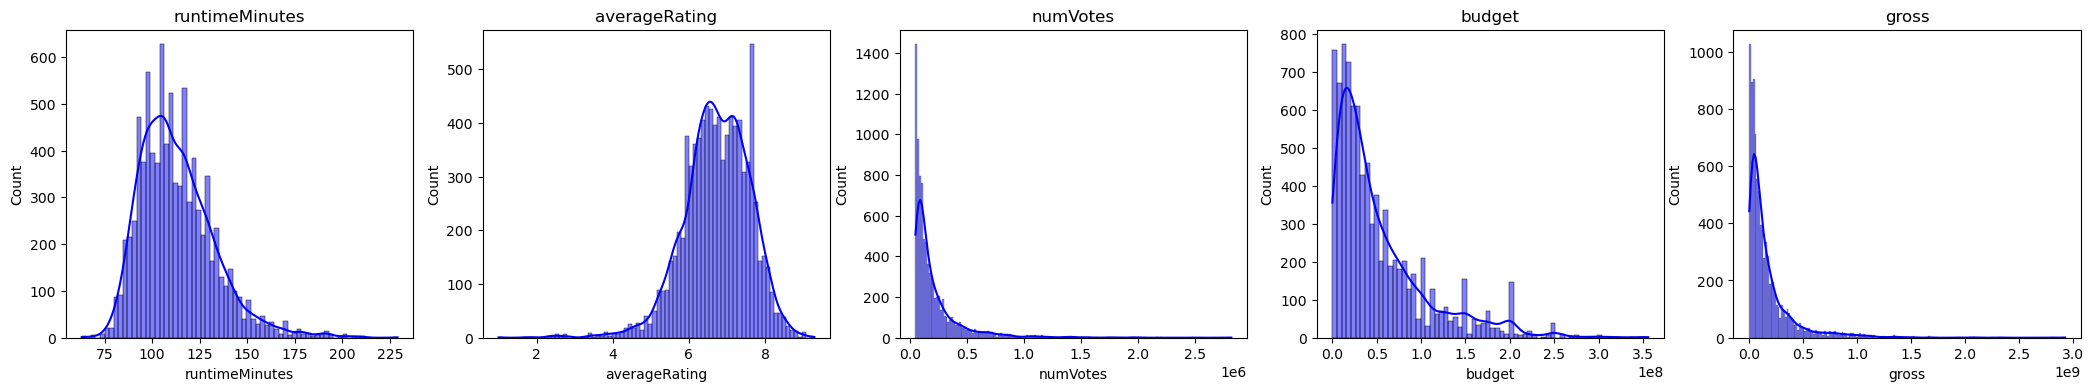

In [35]:
# hàm này sẽ vẽ biểu đồ phân phối của các biến số

# Xác định danh sách các cột số trong DataFrame train
df.replace([np.inf, -np.inf], np.nan, inplace=True)
num_cols = df.select_dtypes(include='number').columns.tolist()

# Vẽ biểu đồ phân phối của các biến số
plt.figure(figsize=(26, 4))
t = 1
for i in num_cols:
    plt.subplot(1, 5, t)
    sns.histplot(df[i], kde=True, color='blue')  
    t += 1
    plt.title(i)
plt.show()

### NHẬN XÉT
* Qua biểu đồ runtimeMinutes ta có thể thấy được là thời gian của phim nằm trong khoảng từ >75 đến dưới 225 phút. Khoảng thời gian có số lượng phim nhiều nhất là từ 80 đến dưới 125 phút
* Tỉ lệ đánh giá trung bình của phi là từ 5-8 là nhiều nhất và số điểm được đánh giá nhiều nhất là > 7 đến < 8
* Số lượng vote cho từng phim là không lớn. tỉ  lệ người không đánh giá chiếm tỉ lệ cao hơn so với người đánh giá
* Chi phí để xây dựng phim đa số là thấp.
* Lợi nhuận thu trước thuế cũng thấp

In [13]:
#Lấy các cột chứa dữ liệu kiểu số
nums_cols=df.select_dtypes(include=np.number).columns
nums_cols

Index(['runtimeMinutes', 'averageRating', 'numVotes', 'budget', 'gross'], dtype='object')

C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

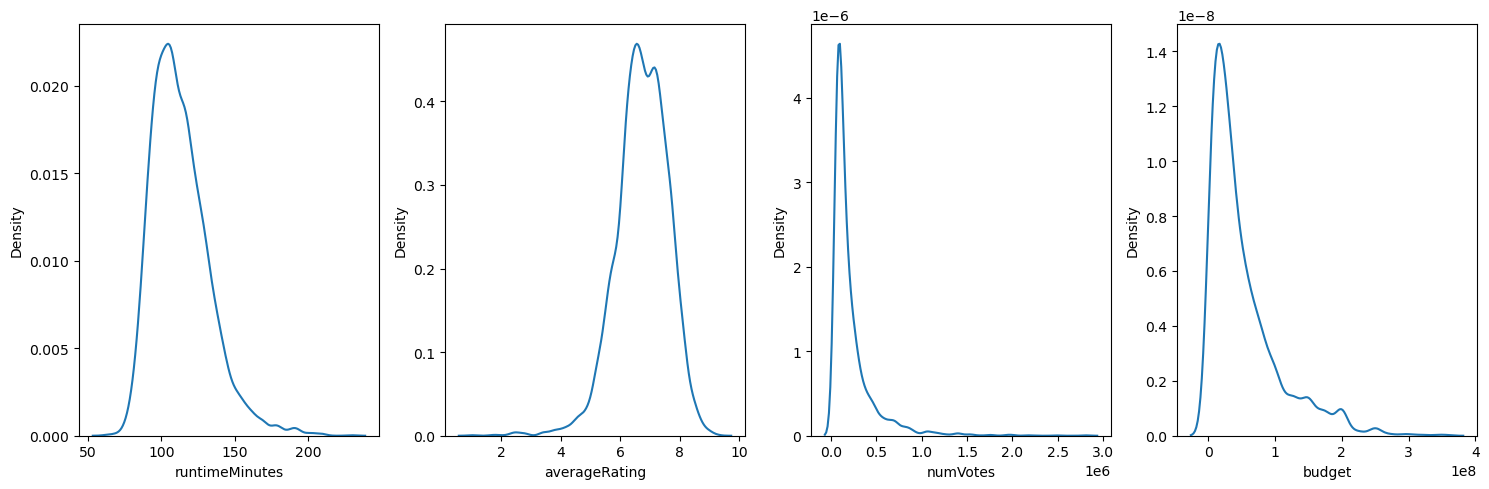

In [14]:
plt.figure(figsize=(15, 5))  # Đặt kích thước của hình vẽ

nums_cols = df.select_dtypes(include='number').columns.tolist()

t = 1
for i in nums_cols:
    if t <= 4:  # Đảm bảo rằng t không vượt quá 4
        plt.subplot(1, 4, t)
        sns.kdeplot(df[i])
        t += 1

plt.tight_layout()
plt.show()

In [18]:
#các cột chứa dữ liệu chữ
categorical_cols_to_display = [ 
                                 'primaryTitle',
                                 'genres',
                                 'directors'
                                ]

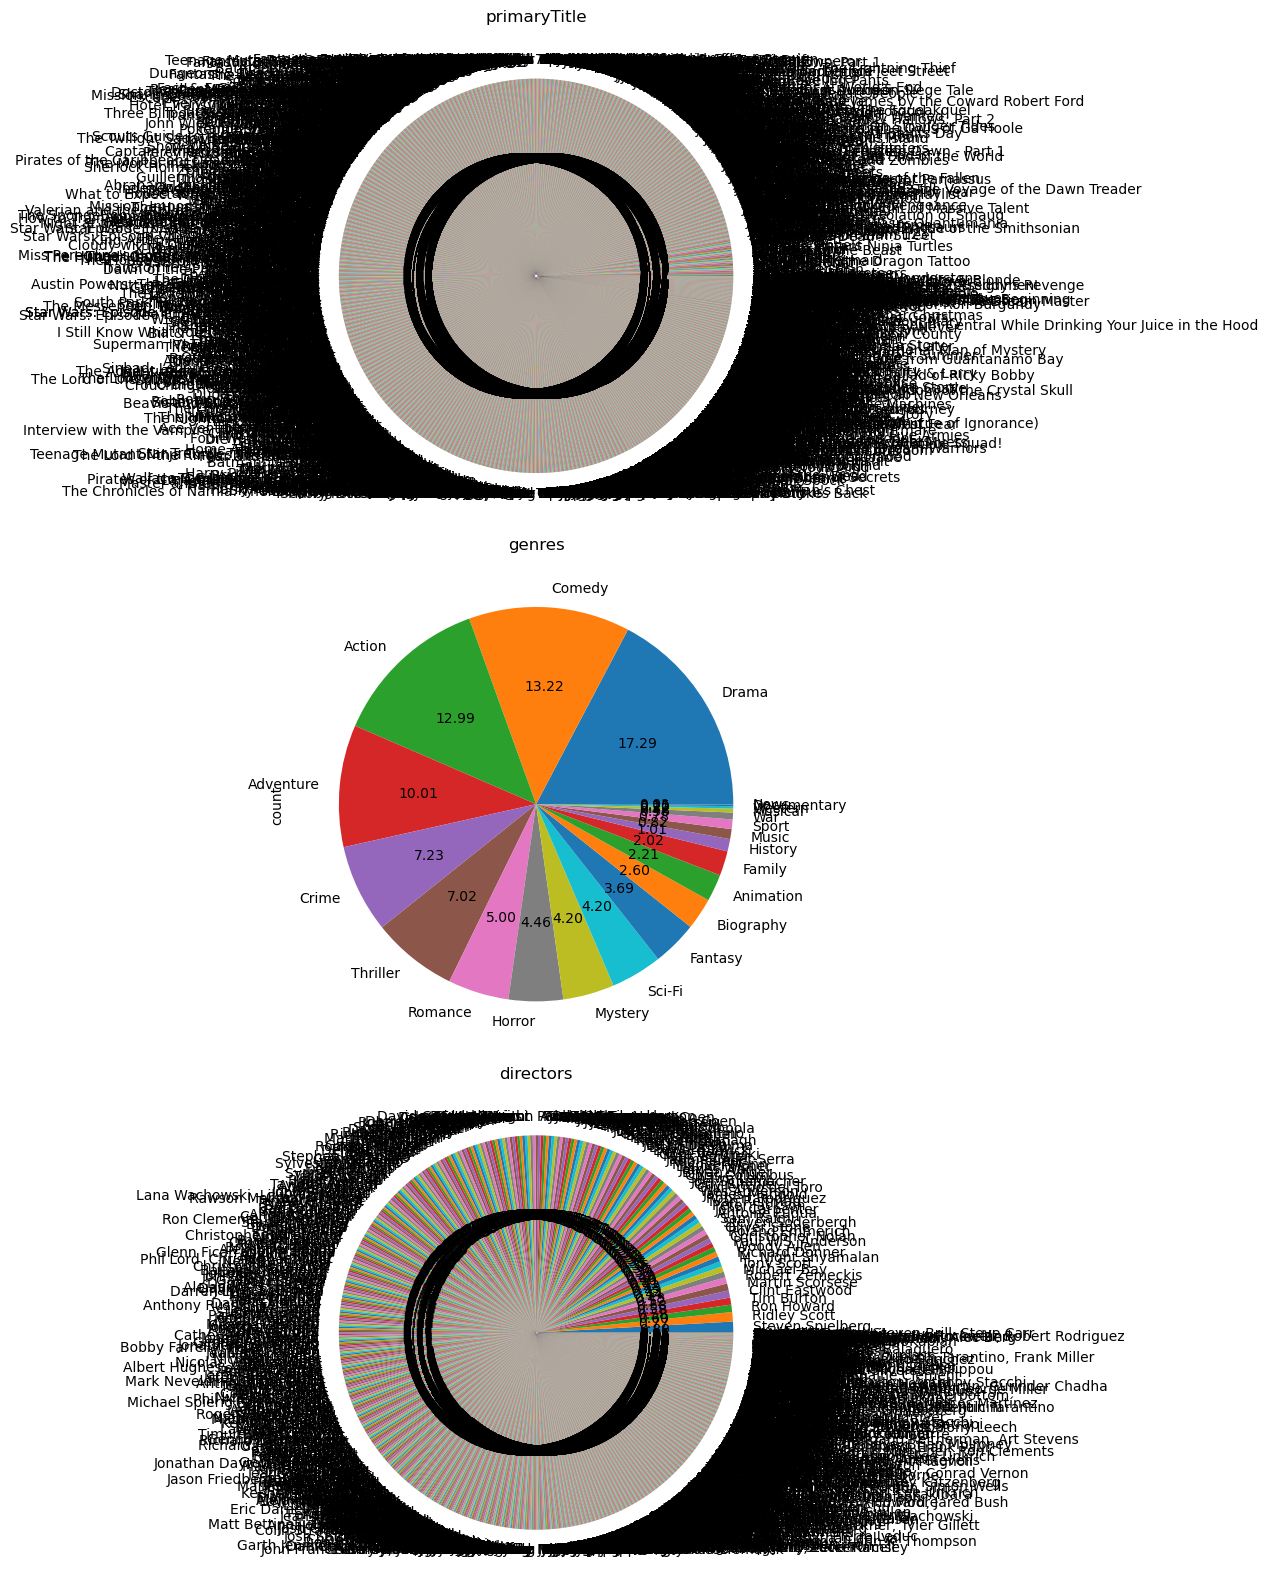

In [51]:
 plt.figure(figsize=(16,16))
t=1
for i in categorical_cols_to_display:
    plt.subplot(3,1,t)
    df[i].value_counts().plot(kind='pie',autopct='%.2f')
    t=t+1
    plt.title(i)
plt.tight_layout()
plt.show()
# hàm này sẽ vẽ biểu đồ tròn của các biến phân loại

In [15]:
# Trường hợp 1: Số lượng phim theo thể loại
genre_counts = df['genres'].value_counts()
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.xlabel('Thể loại')
plt.ylabel('Số lượng')
plt.title('Số lượng phim theo thể loại')
plt.xticks(rotation=45)
plt.show()

In [49]:
# Trường hợp 2: Số lượng phim theo đạo diễn
director_counts = df['directors'].value_counts().head(50)
plt.figure(figsize=(10, 6))
director_counts.plot(kind='bar')
plt.xlabel('Đạo diễn')
plt.ylabel('Số lượng')
plt.title('Số lượng phim theo đạo diễn')
plt.xticks(rotation=90)
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15220\353767440.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='genres', y='budget', estimator=np.sum, ci=None)


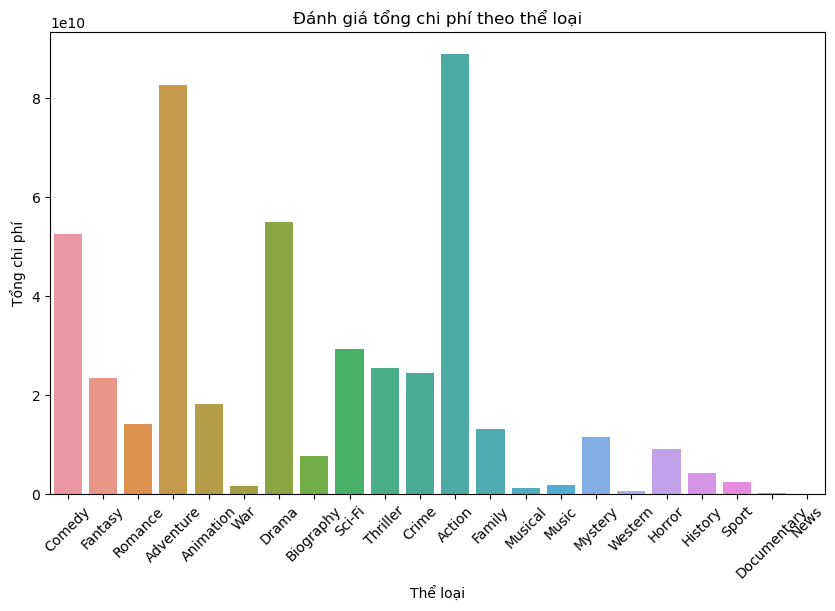

In [44]:
# Trường hợp 3: Đánh giá  chi phí theo thể loại
df['budget'] = df['budget'].astype(float)
genre_budget = df.groupby('genres')['budget'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='genres', y='budget', estimator=np.sum, ci=None)
plt.xlabel('Thể loại')
plt.ylabel('Tổng chi phí')  # Đặt nhãn cho trục y
plt.title('Đánh giá tổng chi phí theo thể loại')
plt.xticks(rotation=45)
plt.show()

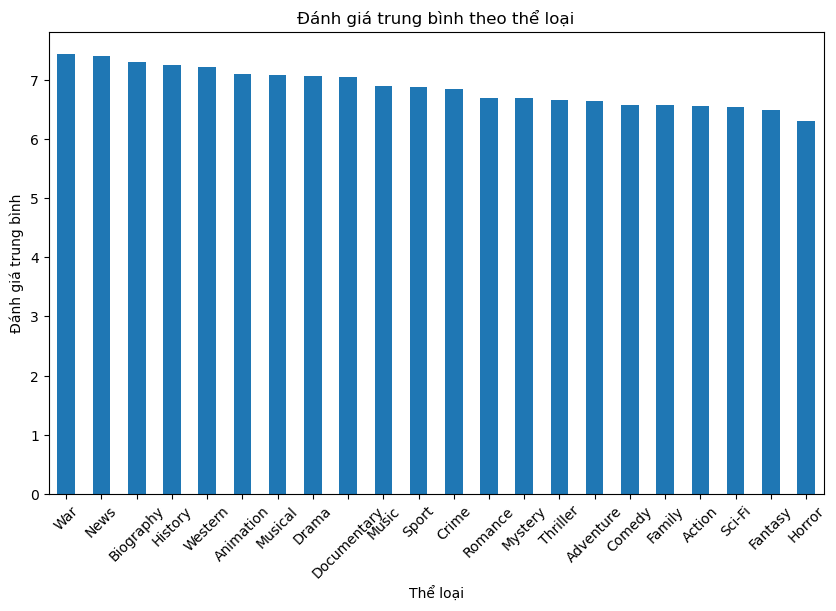

In [45]:
# Trường hợp 4: Đánh giá trung bình theo thể loại
df['averageRating'] = df['averageRating'].astype(float)
genre_ratings = df.groupby('genres')['averageRating'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
genre_ratings.plot(kind='bar')
plt.xlabel('Thể loại')
plt.ylabel('Đánh giá trung bình')
plt.title('Đánh giá trung bình theo thể loại')
plt.xticks(rotation=45)
plt.show()

### Xây dựng các mô hình hồi quy tuyến tính 1 biến 


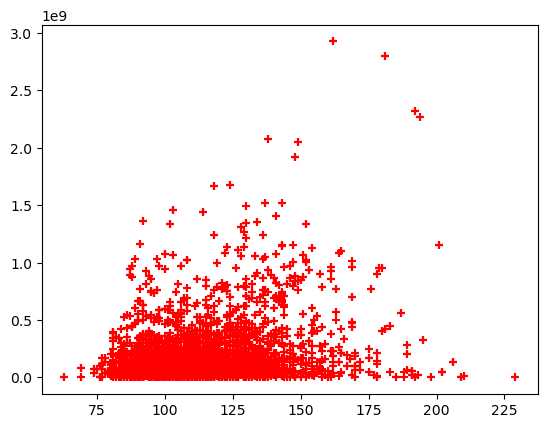

In [27]:
plt.scatter(df['runtimeMinutes'],df['gross'], color="red", marker="+")

linear_regression = LinearRegression()

In [28]:
#train the model
linear_regression.fit(
    #features
    df[['runtimeMinutes']],
    #label
    df['gross']
)

LinearRegression()

In [29]:
m = linear_regression.coef_

b = linear_regression.intercept_

print("Hệ số hồi quy đơn biến:", m)
print("Hệ số chặn đơn biến:", b)

Hệ số hồi quy đơn biến: [3121536.51349451]
Hệ số chặn đơn biến: -178253388.58863547


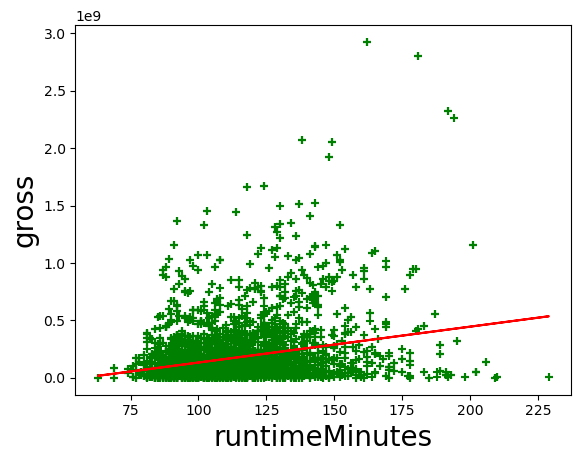

In [30]:
plt.xlabel("runtimeMinutes", fontsize=20)
plt.ylabel("gross", fontsize=20)
plt.scatter(df['runtimeMinutes'],df['gross'], color="green", marker="+")
plt.plot(df['runtimeMinutes'], m * df['runtimeMinutes'] + b, color="red")
plt.show()


### Xây dựng các mô hình hồi quy tuyến tính nhiều biến.


In [31]:
X = df[['runtimeMinutes','averageRating', 'budget']]
y = df['gross']


In [33]:
linear_regression2 = LinearRegression()
#train the model
linear_regression2.fit(
    X,y
)

LinearRegression()

Hệ số hồi quy đa biến: [-4.86105820e+05  5.67500031e+07  3.32765475e+00]
Hệ số chặn đa biến: -329028459.92221963


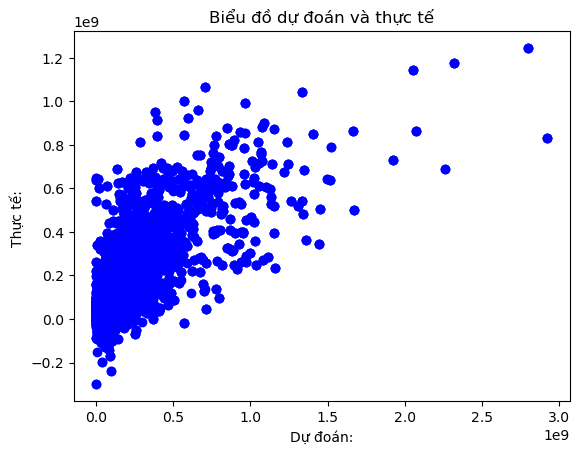

In [34]:
w = linear_regression2.coef_
b2 = linear_regression2.intercept_

print("Hệ số hồi quy đa biến:", w)
print("Hệ số chặn đa biến:", b2)

plt.scatter(y, linear_regression2.predict(X), color='blue')
plt.title('Biểu đồ dự đoán và thực tế')
plt.xlabel('Dự đoán:')
plt.ylabel('Thực tế: ')
plt.show()